# DecisionTree

We are going to use this algorithm on the Iris flower data set which is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936.

# Import data set

In [2]:
import pandas as pd

# We'll use a dataset taken from: https://www.kaggle.com/datasets/uciml/iris
dfIrisPlants = pd.read_csv('../Fundamentals/data/Iris.csv', sep=',')

# Basic EDA and cleaning data

In [3]:
dfIrisPlants.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Just use python variable replacement syntax to make the text dynamic.
from IPython.display import Markdown as md

md(f"The Iris data set consists of {dfIrisPlants.shape[1]} different parameters for {dfIrisPlants.shape[0]} samples.")

The Iris data set consists of 6 different parameters for 150 samples.

Type data and memory usage

In [5]:
dfIrisPlants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Three types of data: int64, float64 and objet data.

The next step is searching for missing, NA and null values.

In [6]:
(dfIrisPlants.isnull() | dfIrisPlants.empty | dfIrisPlants.isna()).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Are there any duplicate entries?

In [7]:
dfIrisPlants[dfIrisPlants.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


So nothing to do. 
And how many classes we have in the target?

In [8]:
import numpy as np
print(np.unique(dfIrisPlants['Species']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


To sum up we have no missing data, no duplicates and three target classes. 
Let's try to visualize the summary statistics.

Text(0.5, 0.98, 'yellow: setosa, green: versicolor, red: virginica')

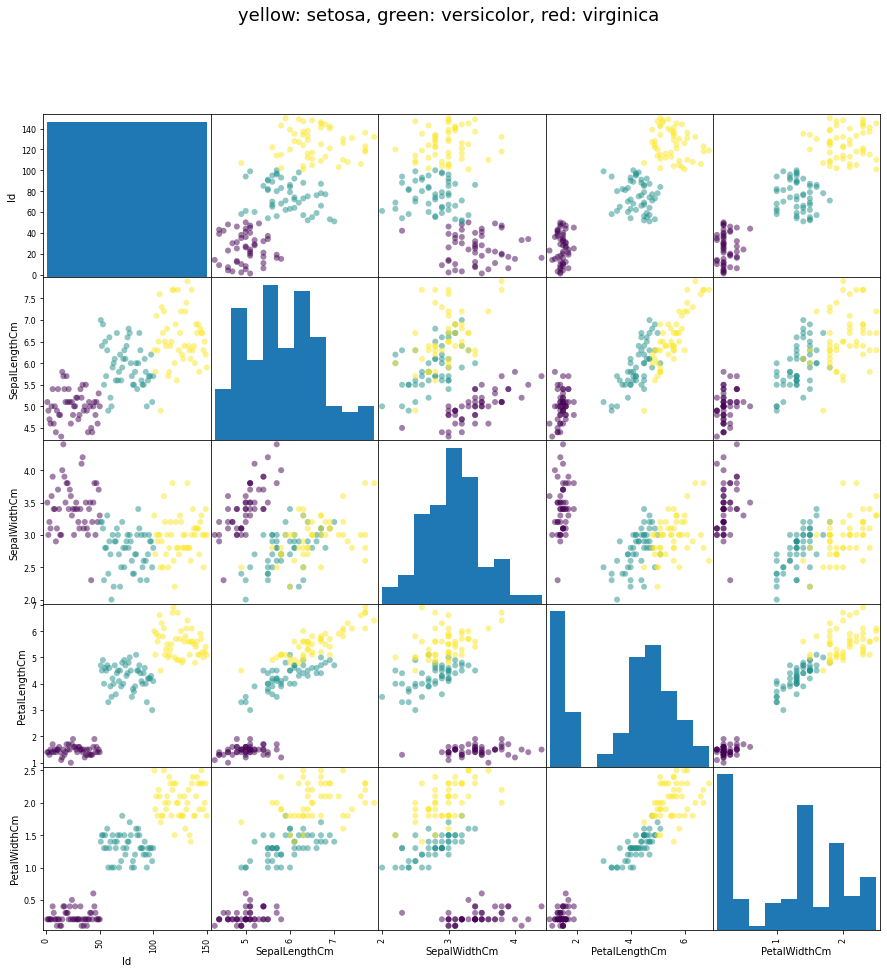

In [9]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

targets = pd.Categorical(dfIrisPlants['Species'])
p=scatter_matrix(dfIrisPlants, c=targets.codes, marker='o',figsize=(15, 15))
fig = plt.gcf()
fig.suptitle("yellow: setosa, green: versicolor, red: virginica", size=18)

We can see that there is positive correlation between petal and sepal length (and length and width column). Sepal length and sepal Width are slightly correlated with each other.
Let's show the ratio between the width and length of sepal leafs and petal leafs.

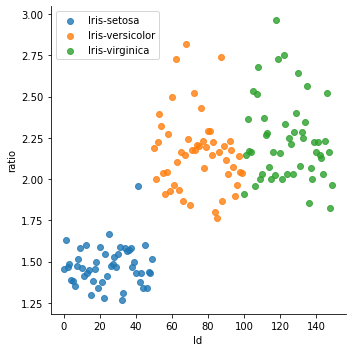

In [10]:
import seaborn as sns

dfIrisPlants["Id"] = dfIrisPlants.index
dfIrisPlants["ratio"] = dfIrisPlants["SepalLengthCm"] / dfIrisPlants["SepalWidthCm"]

sns.lmplot(x="Id", y="ratio", data=dfIrisPlants, hue="Species", fit_reg=False, legend=False)

plt.legend()
plt.show()

# Train and test the model with mean

In [11]:
from sklearn.model_selection import train_test_split

X = dfIrisPlants.drop('Species', axis=1)
y = dfIrisPlants['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Because our goal is to predict which category an Iris flower belongs to, we'll use "Decision Tree Classification" which generates the output as a binary tree-like structure.

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)

text

In [13]:
from sklearn.tree import export_text

cols_names = dfIrisPlants.columns.drop("Species").values.tolist()
text_representation = export_text(model, feature_names=cols_names)
print(text_representation)

|--- ratio <= 1.73
|   |--- class: Iris-setosa
|--- ratio >  1.73
|   |--- Id <= 99.50
|   |   |--- class: Iris-versicolor
|   |--- Id >  99.50
|   |   |--- class: Iris-virginica



dtreeviz is an open-source Python library used to visualize the decisions or rules of a decision tree model.

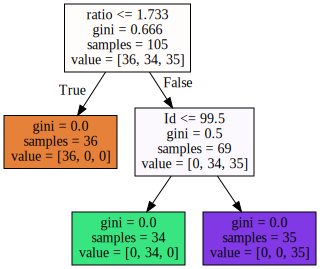

In [19]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(model, filled=True,  feature_names=X.columns)  
graph = graphviz.Source(dot_data) 
graph


NB: on every run samples and other data may change!
We started with 105 samples (because it's train data -> 70%) at the root; and split them into two child nodes with 40 and 65 samples. The trained decision tree having the root node as 'PetalLengthCm': if the length is less than or equal to 2.6 go to the left node; if the length is greater than 2.6 go to the right node. Otherhand, the value = [40, 29, 36], that describes the repartition of these irises species, in this case 40 for the setosa, 29 for the versicolor, and 36 for the virginica. The root node also gives us ‘gini = 0.666’, that is a metric that measures the probability from a randomly chosen element to be incorrectly classified. The formula is:

$I_g(f) = \sum_{i=1}^{m} f_i(1 - f_i) = \sum_{i=1}^{m} (f_i - f_i^2) = \sum_{i=1}^{m} f_i - \sum_{i=1}^{m} f_i^2 = \sum_{i\neq1} f_i f_k $

In fact, because of all the data points are mixed at the root node we hage as gini impurity:

$1 - p_{se}^2 - p_{ve}^2 - p_{vi}^2$

that is:

$ 1 - (\frac {40} {105})^2 - (\frac {29} {105})^2 - (\frac {36} {105})^2 = 1 - 0,145124717 - 0,076281179 - 0,117551020 = 0,661043084 $

That is what is showed in the root node.

The Gini impurity for the left leaf is 0.0 because:

$ 1 - (\frac {40} {40})^2 - (\frac {0} {40})^2 - (\frac {0} {40})^2 = 1 - 1 - 0 - 0 = 0 $

As the Gini impurity is 0 for the left leaf, we cannot have a more homogeneous group, so the algorithm will not try to split this part anymore and will focus on the right part of the tree.
So, it continues to use the id feature to split the right part in two.

In thes case, the Gini impurity for the right leaf is 0.494 because:

$ 1 - (\frac {0} {65})^2 - (\frac {29} {65})^2 - (\frac {36} {65})^2 = 1 - 0 - 0,199053254 - 0,306745562 = 0,494201184 $

Finally, from the right node, we can split into two more nodes, where we cannot split further.

# Model Performance Analysis

In [ ]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, p_train)
acc_test = accuracy_score(y_test, p_test)

print(f'Train {acc_train}, Test {acc_test}')

In [ ]:
from sklearn.metrics import classification_report

confusionMatrix = pd.crosstab(y_test, p_test)
classificationReport = classification_report(y_test, p_test)

fx = sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
fx.set_title('Confusion matrix\n\n');
fx.set_xlabel('\nValues model predicted')
fx.set_ylabel('True Values ')
plt.show()

print(f"Classification Report\n{classificationReport}")